# Gaming rating-prediction

In [1]:
import pandas as pd

df = pd.read_json('Video_Games.json.gz', lines=True, nrows=500000)

train_set = df[:300000]
test_set = df[300000:400000]
validation_set = df[400000:]

shuffled_df = df.sample(frac=1)

s_train = shuffled_df[:300000]
s_test = shuffled_df[300000:400000]
s_val = shuffled_df[400000:]

In [2]:
df.head(1)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1,True,"06 9, 2014",A21ROB4YDOZA5P,0439381673,Mary M. Clark,I used to play this game years ago and loved i...,Did not like this,1402272000,NaN,NaN,NaN


## Dataset exploration

In [3]:
from collections import defaultdict
ratings_per_user = defaultdict(int)
ratings_per_item = defaultdict(int)
for user, item in zip(df['reviewerID'], df['asin']):
    ratings_per_user[user] += 1
    ratings_per_item[item] += 1

avg_ratings_per_user = sum(ratings_per_user.values())/len(ratings_per_user)
avg_ratings_per_item = sum(ratings_per_item.values())/len(ratings_per_item)

print(f"Number of users: {len(ratings_per_user)}")
print(f"Number of items: {len(ratings_per_item)}")
print(f"Each user has rated an average of {avg_ratings_per_user} items")
print(f"Each item has been rated an average of {avg_ratings_per_item} times")

Number of users: 344165
Number of items: 9597
Each user has rated an average of 1.4527915389420771 items
Each item has been rated an average of 52.099614462852976 times


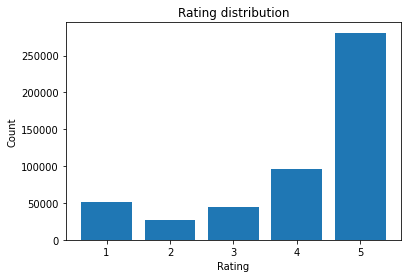

In [4]:
import matplotlib.pyplot as plt

ratings = [rating for rating in df['overall']]
rating_count = {rating:0 for rating in [i for i in range(1, 5+1)]}
for rating in ratings:
    rating_count[rating] += 1

plt.bar(rating_count.keys(), rating_count.values())
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating distribution")
plt.savefig('plots/rating_distribution.pdf')  

In [3]:
from datetime import datetime

def parse_time(time_string):
    day = int(time_string[3:len(time_string) - 6])
    month = int(time_string[:2])
    year = int(time_string[-4:])
    return datetime(year=year, month=month, day=day)


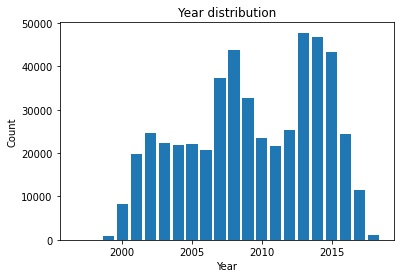

In [6]:
review_times = df['reviewTime']

review_years = [parse_time(time).year for time in review_times]
year_count = {year:0 for year in range(min(review_years), max(review_years) + 1)}
for year in review_years:
    year_count[year] += 1

plt.bar(year_count.keys(), year_count.values())
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Year distribution")
plt.savefig('plots/year_distribution.pdf')  

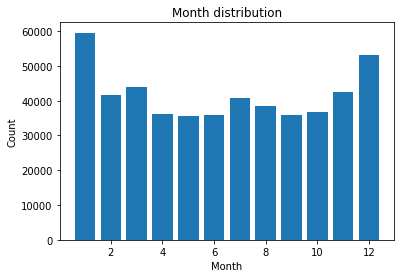

In [7]:
review_months = [parse_time(time).month for time in review_times]
month_count = {month:0 for month in range(1, 12+1)}
for month in review_months:
    month_count[month] += 1

plt.bar(month_count.keys(), month_count.values())
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Month distribution")
plt.savefig('plots/month_distribution.pdf')  


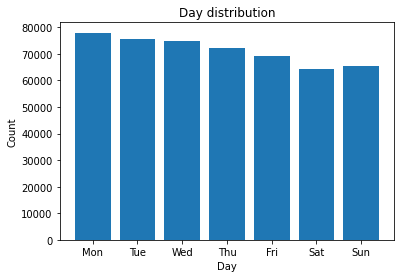

In [8]:
review_weekdays = [parse_time(time).weekday() for time in review_times]
weekday_count = {weekday:0 for weekday in range(7)}
for weekday in review_weekdays:
    weekday_count[weekday] += 1

plt.bar(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], weekday_count.values())
plt.xlabel("Day")
plt.ylabel("Count")
plt.title("Day distribution")
plt.savefig('plots/day_distribution.pdf')  

In [9]:
ratings_per_year = defaultdict(list)
ratings_per_month = defaultdict(list)
ratings_per_weekday = defaultdict(list)

for time, rating in zip(df['reviewTime'], df['overall']):
    ratings_per_year[parse_time(time).year].append(rating)
    ratings_per_month[parse_time(time).month].append(rating)
    ratings_per_weekday[parse_time(time).weekday()].append(rating)

avg_rating_per_year = {year:sum(ratings)/len(ratings) for year, ratings in ratings_per_year.items()}
avg_rating_per_month = {month:sum(ratings)/len(ratings) for month, ratings in ratings_per_month.items()}
avg_rating_per_weekday = {weekday:sum(ratings)/len(ratings) for weekday, ratings in ratings_per_weekday.items()}

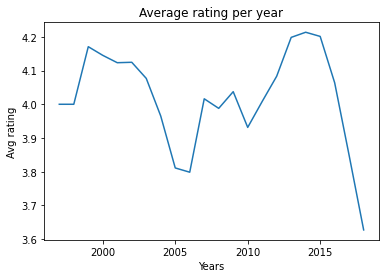

In [10]:
from collections import OrderedDict
ordered_years = OrderedDict(sorted(avg_rating_per_year.items()))
plt.plot(ordered_years.keys(), ordered_years.values())
plt.xlabel("Years")
plt.ylabel("Avg rating")
plt.title("Average rating per year")
plt.savefig('plots/avg_rating_per_year.pdf')  

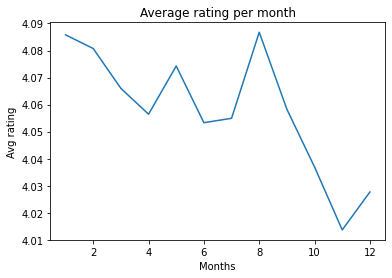

In [11]:
from collections import OrderedDict
ordered_months = OrderedDict(sorted(avg_rating_per_month.items()))
plt.plot(ordered_months.keys(), ordered_months.values())
plt.xlabel("Months")
plt.ylabel("Avg rating")
plt.title("Average rating per month")
plt.savefig('plots/avg_rating_per_month.pdf')  

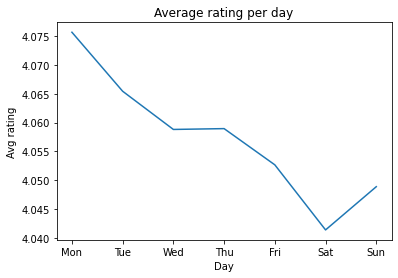

In [12]:
from collections import OrderedDict
ordered_weekdays = OrderedDict(sorted(avg_rating_per_weekday.items()))
plt.plot(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered_weekdays.values())
plt.xlabel("Day")
plt.ylabel("Avg rating")
plt.title("Average rating per day")
plt.savefig('plots/avg_rating_per_day.pdf')  

In [13]:
df.head(1)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1,True,"06 9, 2014",A21ROB4YDOZA5P,0439381673,Mary M. Clark,I used to play this game years ago and loved i...,Did not like this,1402272000,NaN,NaN,NaN


In [14]:
ratings_per_length = defaultdict(list)
for rating, text in zip(df['overall'], df['reviewText']):
    ratings_per_length[len(str(text))].append(rating)

for key, value in ratings_per_length.items():
    ratings_per_length[key] = sum(value)/len(value)

from collections import OrderedDict
import numpy as np

ordered_length = OrderedDict(sorted(ratings_per_length.items()))

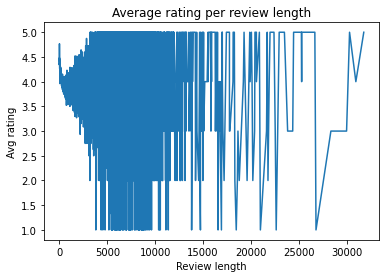

In [15]:
x = list(ordered_length.keys())
y = list(ordered_length.values())

plt.plot(x, y)
plt.xlabel("Review length")
plt.ylabel("Avg rating")
plt.title("Average rating per review length")
plt.savefig('plots/avg_rating_per_review_length.pdf')  
plt.show()

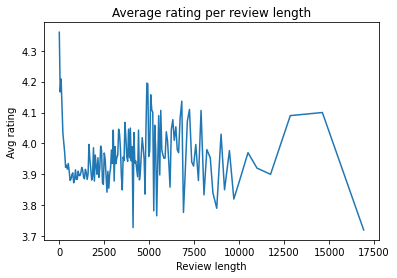

In [16]:
x_bucket = [x[50*i] for i in range(int(len(x)/50))]
y_bucket = [sum(y[50*i:50*i+50])/50 for i in range(int(len(y)/50))]

plt.plot(x_bucket, y_bucket)
plt.xlabel("Review length")
plt.ylabel("Avg rating")
plt.title("Average rating per review length")
plt.savefig('plots/avg_rating_per_review_length.pdf')  
plt.show()

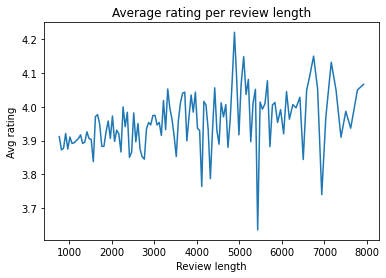

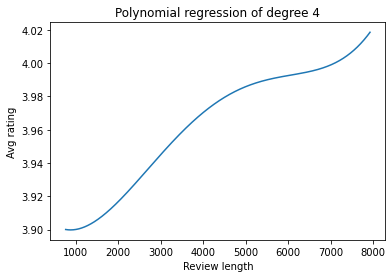

In [17]:
x = list(ordered_length.keys())
y = list(ordered_length.values())

x = x[int(len(x)*0.1):int(len(x)*0.90)]
y = y[int(len(y)*0.1):int(len(y)*0.90)]

x_bucket = [x[50*i] for i in range(int(len(x)/50))]
y_bucket = [sum(y[50*i:50*i+50])/50 for i in range(int(len(y)/50))]

mymodel = np.poly1d(np.polyfit(x_bucket,y_bucket, 4))
myline = np.linspace(767, 7924, 1000)

plt.plot(x_bucket, y_bucket)
plt.xlabel("Review length")
plt.ylabel("Avg rating")
plt.title("Average rating per review length")
plt.savefig('plots/avg_rating_per_review_length_scaled.pdf')  
plt.show()

plt.plot(myline, mymodel(myline))
plt.xlabel("Review length")
plt.ylabel("Avg rating")
plt.title("Polynomial regression of degree 4")
plt.savefig('plots/avg_rating_per_review_length_regression.pdf')  
plt.show()

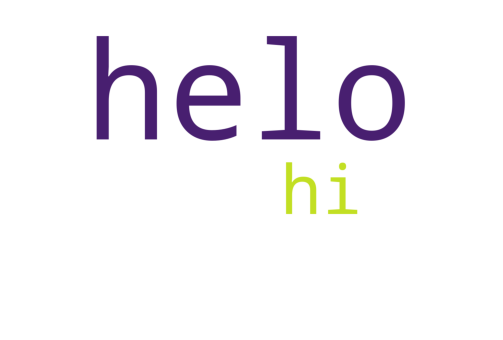

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

dictionary = {"helo":1000000, "hi":1}

wordcloud = WordCloud(background_color='white',
                      width=1500,
                      height=1000
                      ).generate_from_frequencies(dictionary)
# use .generate(space_separated_string) - to generate cloud from text

plt.figure(figsize=(9,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Linear regression baseline

In [4]:
def feature(time, length):
    month = time.month
    year = time.year

    month_feat = [0]*11
    month_feat[month-2] = 1 if month!=1 else 0

    year_feat = [0]*(2018-1997)
    year_feat[year-1997-1] = 1 if year!=1997 else 0

    return [1] + [length] + month_feat + year_feat

times = [parse_time(time) for time in s_train['reviewTime']]
lengths = [len(str(review_text)) for review_text in s_train['reviewText']]

y = [rating for rating in s_train['overall']]
X = [feature(time, length) for time, length in zip(times, lengths)]

In [5]:
from sklearn import linear_model
model = linear_model.LinearRegression()

model.fit(X, y)

test_times = [parse_time(time) for time in s_test['reviewTime']]
test_lengths = [len(str(review_text)) for review_text in s_test['reviewText']]
X_test = [feature(time, length) for time, length in zip(test_times, test_lengths)]
y_test = [rating for rating in s_test['overall']]


y_pred = model.predict(X_test)

mse = 0
for true, pred in zip(y_test, y_pred):
    mse += (true - pred)**2
mse = mse/len(y_test)

print(f"MSE of baseline 2: {mse}")

MSE of baseline 2: 1.7783814659111743


## FISM

In [20]:
shuffled_df = df.sample(frac=1)

s_train = shuffled_df[:300000]
s_test = shuffled_df[300000:400000]
s_val = shuffled_df[400000:]

In [21]:
s_train.head(1)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
367868,5,False,"08 14, 2007",A2F7PFUMCWHC9N,B000NNDN1M,John Doe,Super Paper Mario is a truly great game. Findi...,Great old school fun,1187049600,NaN,NaN,NaN


In [22]:
users = [user for user in s_train['reviewerID']]
games = [game for game in s_train['asin']]

unique_users = set(users)
unique_games = set(games)

num_users = len(unique_users)
num_games = len(unique_games)

games_per_user = defaultdict(list)
users_per_game = defaultdict(list)

for user, game in zip(users, games):
    games_per_user[user].append(game)
    users_per_game[game].append(user)

In [23]:
index_user = {}
for index, user in enumerate(unique_users):
    index_user[user] = index

index_game = {}
for index, game in enumerate(unique_games):
    index_game[game] = index

In [24]:
R = np.zeros([num_users, num_games])
for user in unique_users:
    for game in games_per_user[user]:
        R[index_user[user], index_game[game]] = 1


In [25]:
len(games_per_user)

224856

In [26]:
vec = [1 if len(games)>1 else 0 for _user, games in games_per_user.items()]
sum(vec)

33737

In [1]:
import scipy.signal as signal
import numpy as np
import sk_dsp_comm.sigsys as ss
from pynq import Overlay
from pynq import allocate
import numpy as np
import time
from IPython.display import Audio
import sk_dsp_comm.rtlsdr_helper as sdr_helper
from IPython.display import Audio

def linear_filter(b, x):
    y = np.zeros_like(x)
    buff = np.zeros(b.shape, dtype=type(x[0]))
    b_len = len(buff)
    for i in range(len(y)):
        for j in range(b_len-1):
            buff[b_len-1-j] = buff[b_len-2-j]
        buff[0] = x[i]
        
        temp = 0
        for j in range(b_len):
            temp += buff[j]*b[j]
        y[i] = temp
    return y

def downsample_impl(x, M, p=0):  
    if not isinstance(M, int):
        raise TypeError("M must be an int")
    x = x[0:int(np.floor(len(x)/M))*M]
    x = x.reshape((int(np.floor(len(x)/M)),M))
    y = x[:,p]
    return y

def discrim_impl(x):
    """
    function disdata = discrim(x)
    where x is an angle modulated signal in complex baseband form.
    
    Mark Wickert
    """
    X=np.real(x)        # X is the real part of the received signal
    Y=np.imag(x)        # Y is the imaginary part of the received signal
    b=np.array([1, -1]) # filter coefficients for discrete derivative
    derY=linear_filter(b,Y)  # derivative of Y, 
    derX=linear_filter(b,X)  #    "          X,
    disdata=(X*derY-Y*derX)/(X**2+Y**2)
    return disdata

def mono_FM_impl(x,fs=2.4e6,file_name='test.wav'):
    """
    Decimate complex baseband input by 10
    Design 1st decimation lowpass filter (f_c = 200 KHz)
    """
    b = signal.firwin(64,2*200e3/float(fs))
    # Filter and decimate (should be polyphase)
    y = linear_filter(b,x)
    print(f"lfilter1 output: {y[0]}")
    z = downsample_impl(y,10)
    print(f"downsample10 output: {z[0]}")
    # Apply complex baseband discriminator
    z_bb = discrim_impl(z)
    print(f"discrim output: {z_bb[0]}")
    # Design 2nd decimation lowpass filter (fc = 12 KHz)
    bb = signal.firwin(64,2*12e3/(float(fs)/10))
    # Filter and decimate
    zz_bb = linear_filter(bb,z_bb)
    print(f"lfilter2 output: {zz_bb[0]}")
    # Decimate by 5
    z_out = downsample_impl(zz_bb,5)
    print(f"downsample5 output: {z_out[0]}")
    # Save to wave file
    # ss.to_wav(file_name, 48000, z_out/2)
    print('Done!')
    return z_bb, z_out

In [3]:
tic = time.perf_counter()
z_bb, z_out = mono_FM_impl(samples, fs=2.4e6, file_name='SW3.wav')
toc = time.clock()
print("Proceesing time: {} seconds".format(toc - tic))
Audio(z_out, rate=48000)

NameError: name 'samples' is not defined